# TASK #1: UNDERSTAND THE PROBLEM STATEMENT  

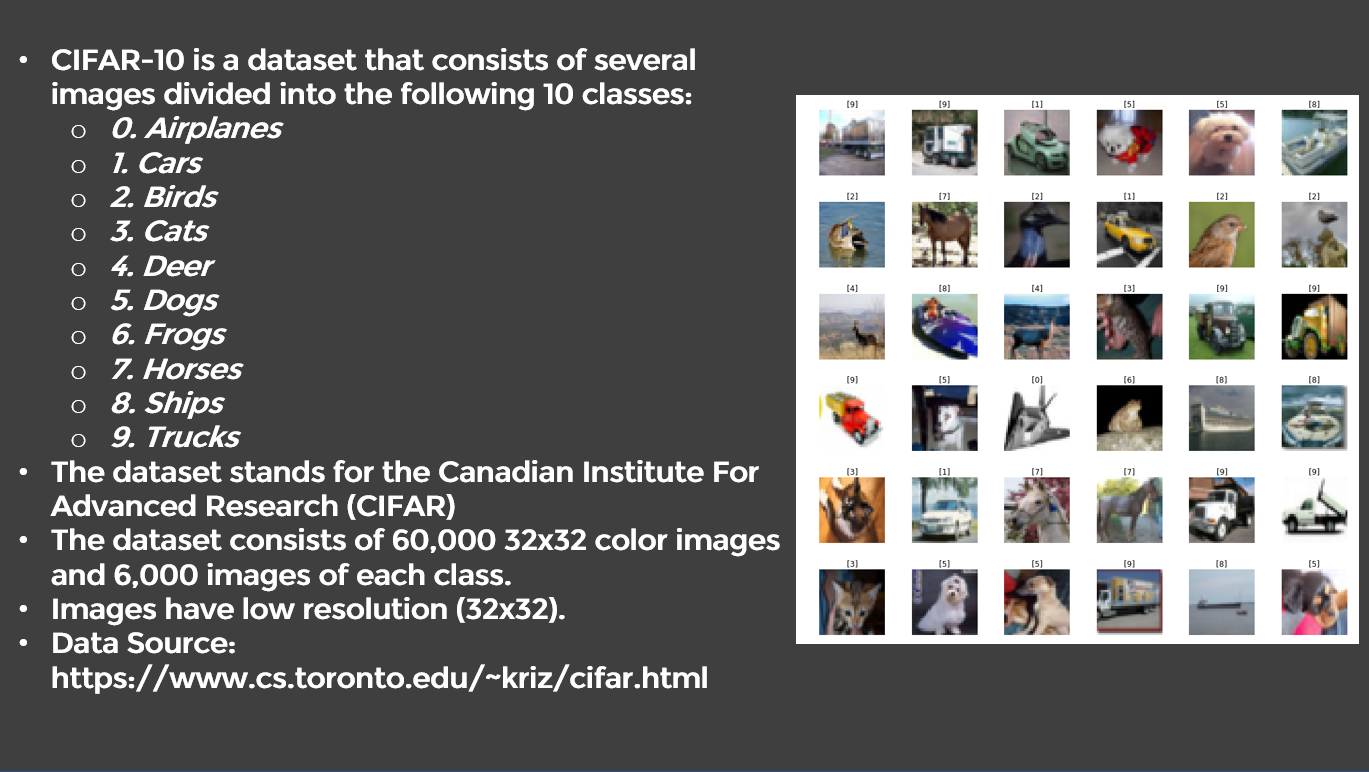

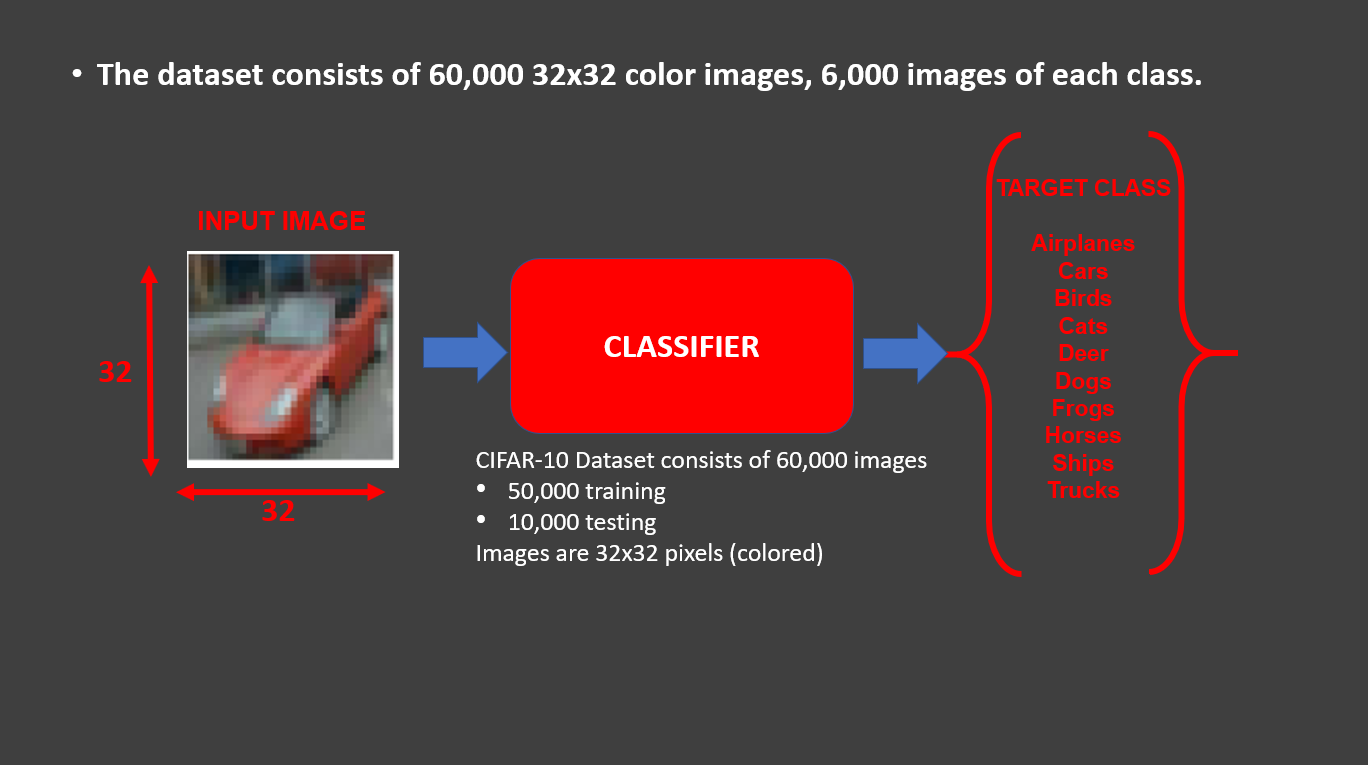

# TASK #2: IMPORT LIBRARIES AND DATASET

In [36]:
import numpy as np
import datetime
import tensorflow as tf

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.optimizers import SGD

In [2]:
# Import Cifar-10 dataset
(X_train,y_train),(X_test,y_test) = tf.keras.datasets.cifar10.load_data()

**PRACTICE OPPORTUNITY #1:**
- **Check out the sizes of both training and testing datasets**

In [3]:
print('X_train shape : ',X_train.shape)

X_train shape :  (50000, 32, 32, 3)


In [4]:
print('y_train shape : ',y_train.shape)

y_train shape :  (50000, 1)


In [5]:
print('X_test shape : ',X_test.shape)

X_test shape :  (10000, 32, 32, 3)


In [6]:
print('y_test shape : ',y_test.shape)

y_test shape :  (10000, 1)


# TASK #3: PERFORM DATA VISUALIZATION

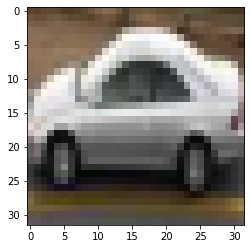

In [7]:
# Select a sample training image and visualize it
plt.imshow(X_train[random.randint(1,len(X_train))])

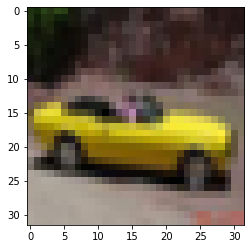

In [8]:
# Select a sample testing image and visualize it
plt.imshow(X_test[random.randint(1,len(X_test))])

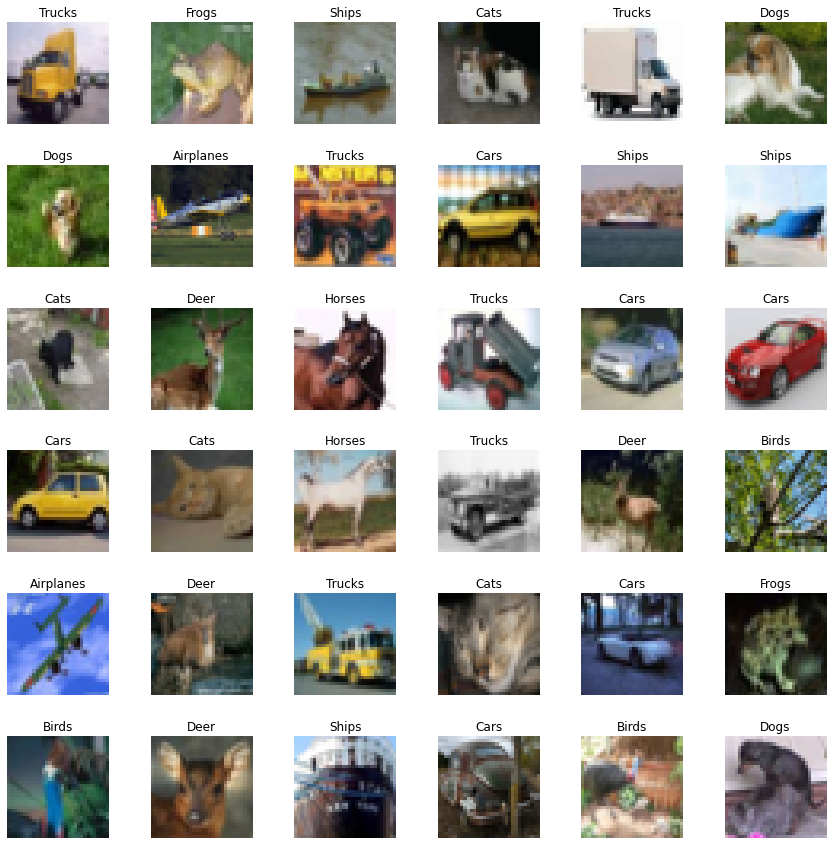

In [9]:
W_grid = 6
L_grid = 6
dict = {'0':'Airplanes','1':'Cars','2':'Birds','3':'Cats','4':'Deer','5':'Dogs','6':'Frogs','7':'Horses','8':'Ships','9':'Trucks'}
fig, axes = plt.subplots(L_grid, W_grid, figsize = (15, 15))
axes = axes.ravel()

n_training = len(X_train)

for i in np.arange(0, L_grid * W_grid):
    index = np.random.randint(0, n_training) # pick a random number
    axes[i].imshow(X_train[index])
    axes[i].set_title(dict[str(y_train[index])[1]])
    axes[i].axis('off')
    
plt.subplots_adjust(hspace = 0.4)

**PRACTICE OPPORTUNITY #2:**
- **Plot a grid containing 100 images from the testing dataset and perform a sanity check on the data** 

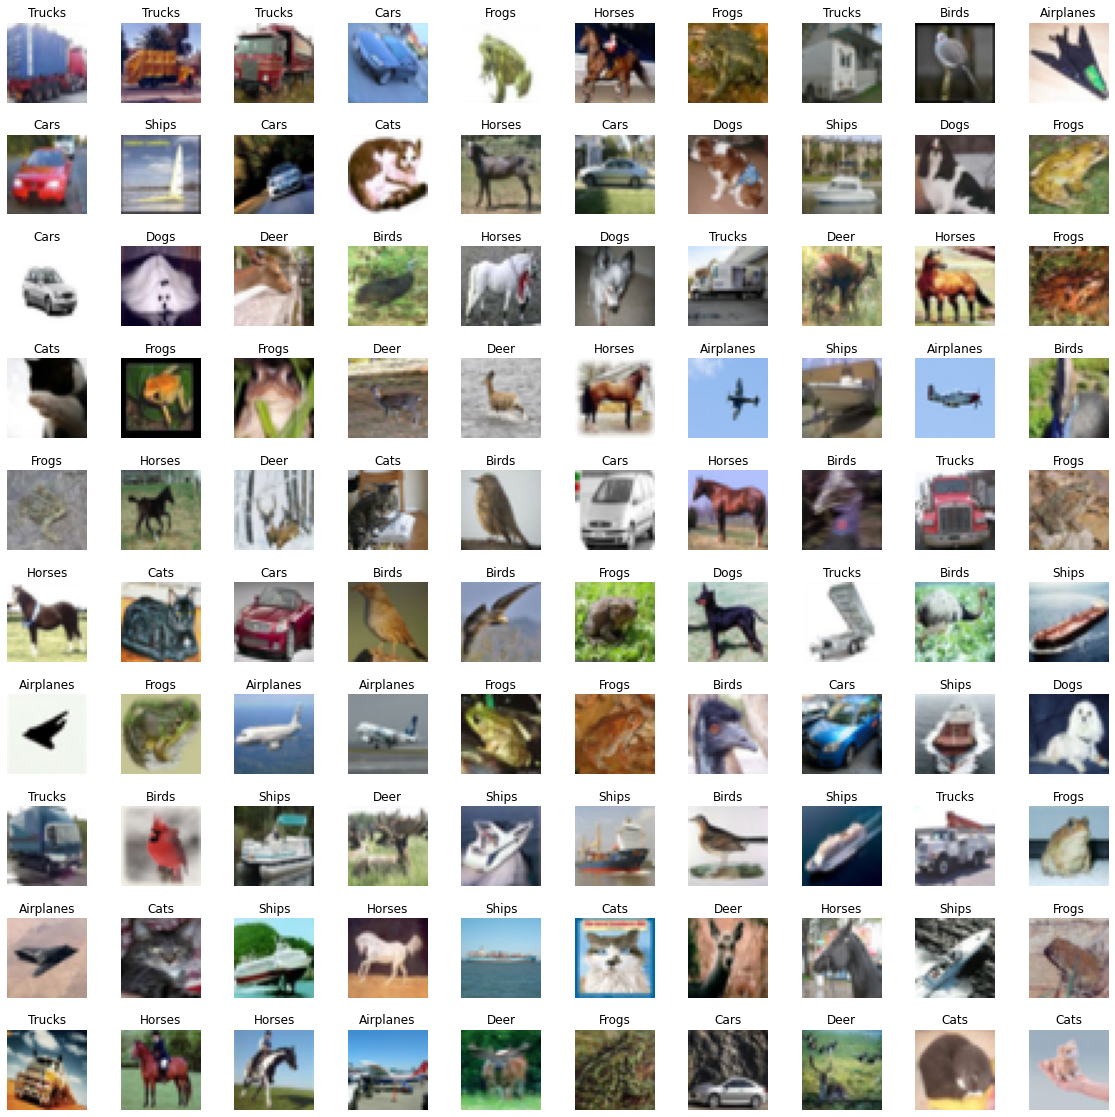

In [10]:
W_grid = 10
L_grid = 10
dict = {'0':'Airplanes','1':'Cars','2':'Birds','3':'Cats','4':'Deer','5':'Dogs','6':'Frogs','7':'Horses','8':'Ships','9':'Trucks'}
fig, axes = plt.subplots(L_grid, W_grid, figsize = (20, 20))
axes = axes.ravel()

n_testing = len(X_test)

for i in np.arange(0, L_grid * W_grid):
    index = np.random.randint(0, n_testing) # pick a random number
    axes[i].imshow(X_test[index])
    axes[i].set_title(dict[str(y_test[index])[1]])
    axes[i].axis('off')
    
plt.subplots_adjust(hspace = 0.4)

# TASK #4: PREPARE THE DATA FOR TRAINING

In [11]:
n_training

50000

In [12]:
X_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [13]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [14]:
number_cat = 10    # number of classes

In [15]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [16]:
y_train = tf.keras.utils.to_categorical(y_train, number_cat)

In [17]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [18]:
y_test = tf.keras.utils.to_categorical(y_test, number_cat)

In [19]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [20]:
# Normalize pixels
X_train = X_train/255
X_test = X_test/255


In [21]:
X_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [22]:
X_train.shape

(50000, 32, 32, 3)

In [23]:
Input_shape = X_train.shape[1:]

In [24]:
Input_shape

(32, 32, 3)

In [25]:
y_train.shape

(50000, 10)

# TASK #5: BUILD A DEEP NEURAL NETWORK MODEL USING KERAS

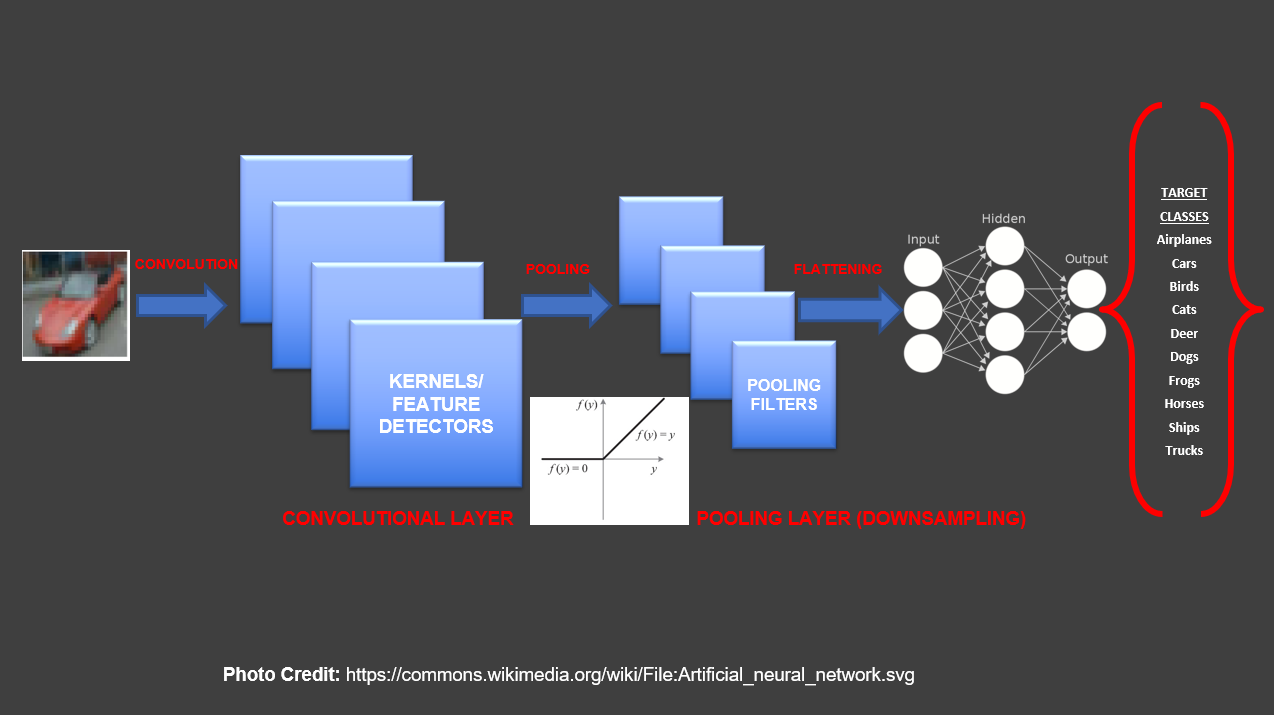

In [37]:
cnn = Sequential()
cnn.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
cnn.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
cnn.add(MaxPooling2D((2, 2)))
cnn.add(Dropout(0.2))
cnn.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
cnn.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
cnn.add(MaxPooling2D((2, 2)))
cnn.add(Dropout(0.2))
cnn.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
cnn.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
cnn.add(MaxPooling2D((2, 2)))
cnn.add(Dropout(0.2))
cnn.add(Flatten())
cnn.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
cnn.add(Dropout(0.2))
cnn.add(Dense(10, activation='softmax'))
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 64)        36928     
                                                      

# TASK #6: COMPILE AND FIT A DEEP NEURAL NETWORK MODEL

In [39]:
cnn.compile(optimizer =SGD(learning_rate=0.001, momentum=0.9), loss ='categorical_crossentropy', metrics =['accuracy'])

In [41]:
history = cnn.fit(X_train,y_train,batch_size=64,epochs=200)

Epoch 1/200
782/782 [==============================] - 133s 171ms/step - loss: 2.0117 - accuracy: 0.2527
Epoch 2/200
782/782 [==============================] - 134s 171ms/step - loss: 1.7277 - accuracy: 0.3640
Epoch 3/200
782/782 [==============================] - 135s 172ms/step - loss: 1.6059 - accuracy: 0.4120
Epoch 4/200
782/782 [==============================] - 133s 170ms/step - loss: 1.4967 - accuracy: 0.4544
Epoch 5/200
782/782 [==============================] - 133s 170ms/step - loss: 1.4081 - accuracy: 0.4918
Epoch 6/200
782/782 [==============================] - 135s 172ms/step - loss: 1.3316 - accuracy: 0.5190
Epoch 7/200
782/782 [==============================] - 137s 175ms/step - loss: 1.2581 - accuracy: 0.5485
Epoch 8/200
782/782 [==============================] - 132s 168ms/step - loss: 1.1944 - accuracy: 0.5710
Epoch 9/200
782/782 [==============================] - 133s 170ms/step - loss: 1.1353 - accuracy: 0.5940
Epoch 10/200
782/782 [==============================] -

782/782 [==============================] - 119s 152ms/step - loss: 0.1456 - accuracy: 0.9464
Epoch 155/200
782/782 [==============================] - 119s 152ms/step - loss: 0.1475 - accuracy: 0.9469
Epoch 156/200
782/782 [==============================] - 119s 152ms/step - loss: 0.1427 - accuracy: 0.9479
Epoch 157/200
782/782 [==============================] - 119s 152ms/step - loss: 0.1455 - accuracy: 0.9477
Epoch 158/200
782/782 [==============================] - 122s 156ms/step - loss: 0.1411 - accuracy: 0.9491
Epoch 159/200
782/782 [==============================] - 126s 161ms/step - loss: 0.1417 - accuracy: 0.9501
Epoch 160/200
782/782 [==============================] - 123s 158ms/step - loss: 0.1344 - accuracy: 0.9519
Epoch 161/200
782/782 [==============================] - 123s 157ms/step - loss: 0.1357 - accuracy: 0.9512
Epoch 162/200
782/782 [==============================] - 126s 162ms/step - loss: 0.1345 - accuracy: 0.9518
Epoch 163/200
782/782 [============================

In [42]:
# serialize model to JSON
model_json = cnn.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
cnn.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


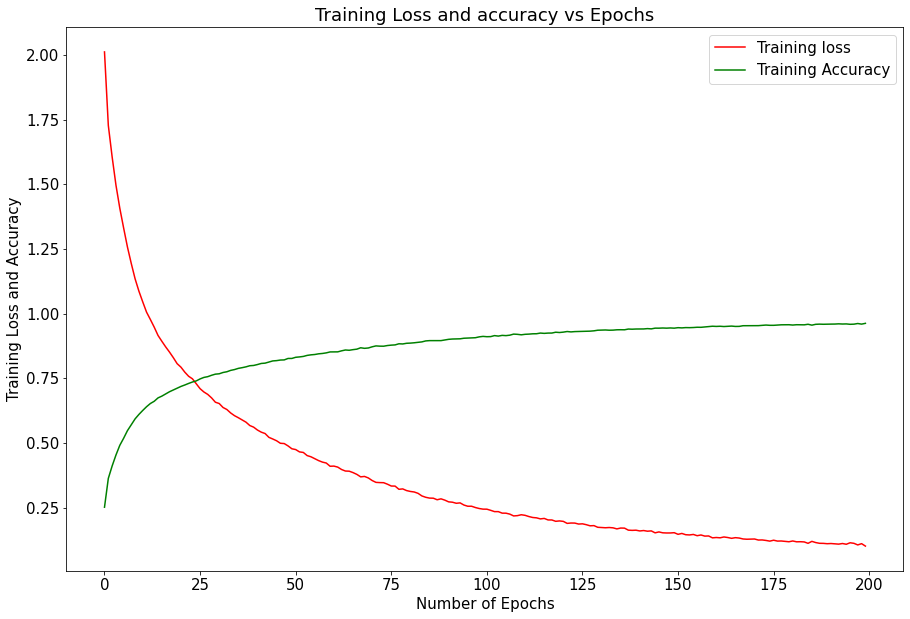

In [54]:
accuracy = history.history['accuracy']
loss = history.history['loss']
epochs = range(len(accuracy))
plt.figure(figsize=(15,10))
plt.rcParams.update({'font.size':15})
plt.plot(epochs,loss,'r-',label='Training loss')
plt.plot(epochs,accuracy,'g-',label = 'Training Accuracy')
plt.title('Training Loss and accuracy vs Epochs')
plt.xlabel('Number of Epochs')
plt.ylabel('Training Loss and Accuracy')
plt.legend()

In [40]:
# load json and create model

# from tensorflow.keras.models import model_from_json

# json_file = open('model.json', 'r')
# loaded_model_json = json_file.read()
# json_file.close()
# cnn = model_from_json(loaded_model_json)
# # load weights into new model
# cnn.load_weights("cifar10_trained_model.h5")
# print("Loaded model from disk")


Loaded model from disk


In [43]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 64)        36928     
                                                      

In [44]:
X_test.shape

(10000, 32, 32, 3)

In [45]:
y_test.shape

(10000, 10)

# TASK #7: EVALUATE TRAINED MODEL

In [46]:
# evaluate loaded model on test data
evaluation = cnn.evaluate(X_test, y_test)
print('Test Accuracy: {} %'.format(evaluation[1]*100))

313/313 [==============================] - 5s 16ms/step - loss: 0.7393 - accuracy: 0.8308
Test Accuracy: 83.07999968528748 %


In [55]:
predicted_classes = cnn.predict(X_test) 
predicted_classes

313/313 [==============================] - 5s 16ms/step


array([[3.25028741e-05, 1.51113355e-07, 1.37655115e-05, ...,
        3.68470543e-09, 9.87912401e-08, 3.05365044e-09],
       [8.05723687e-07, 1.27779194e-05, 5.56229703e-18, ...,
        1.73690864e-22, 9.99986410e-01, 5.19453820e-11],
       [5.02460498e-05, 5.91284806e-05, 2.77273787e-10, ...,
        1.06593880e-08, 9.99864578e-01, 2.59668705e-05],
       ...,
       [3.90190444e-24, 6.37402943e-19, 2.86013528e-15, ...,
        1.48601732e-14, 9.81799638e-24, 1.76539351e-17],
       [1.61859293e-06, 9.99953747e-01, 3.64277403e-05, ...,
        1.74121773e-10, 6.16071569e-11, 8.18672206e-08],
       [2.05285175e-24, 3.64557276e-24, 2.12339047e-14, ...,
        1.00000000e+00, 8.61953317e-28, 9.77694407e-27]], dtype=float32)

In [56]:
predicted_classes = predicted_classes.argmax(1)

In [57]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [58]:
y_test = y_test.argmax(1)

In [59]:
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

In [60]:
predicted_classes

array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

<AxesSubplot:>

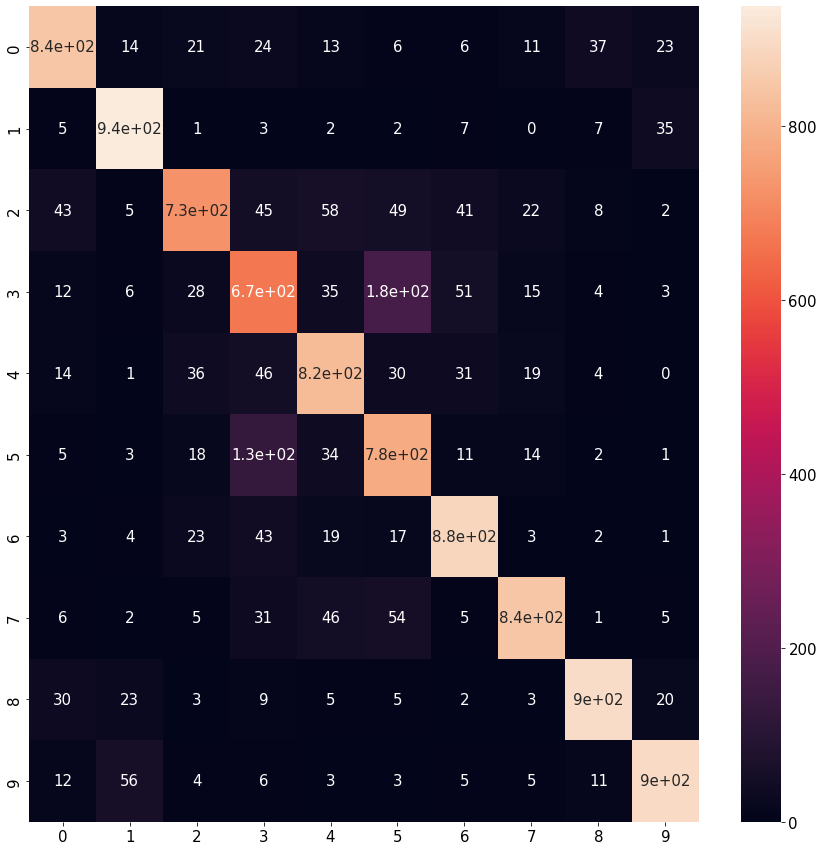

In [61]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
plt.figure(figsize=(15,15))
sns.heatmap(confusion_matrix(y_test,predicted_classes),annot = True)

In [68]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predicted_classes))

              precision    recall  f1-score   support

           0       0.87      0.84      0.86      1000
           1       0.89      0.94      0.91      1000
           2       0.84      0.73      0.78      1000
           3       0.67      0.67      0.67      1000
           4       0.79      0.82      0.81      1000
           5       0.70      0.78      0.74      1000
           6       0.85      0.89      0.87      1000
           7       0.90      0.84      0.87      1000
           8       0.92      0.90      0.91      1000
           9       0.91      0.90      0.90      1000

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000



In [45]:
# CIFAR-10 has 10 Classes as follows: 
# 0. Airplanes
# 1. Cars 
# 2. Birds
# 3. Cats
# 4. Deer
# 5. Dogs
# 6. Frogs
# 7. Horses
# 8. Ships
# 9. Trucks

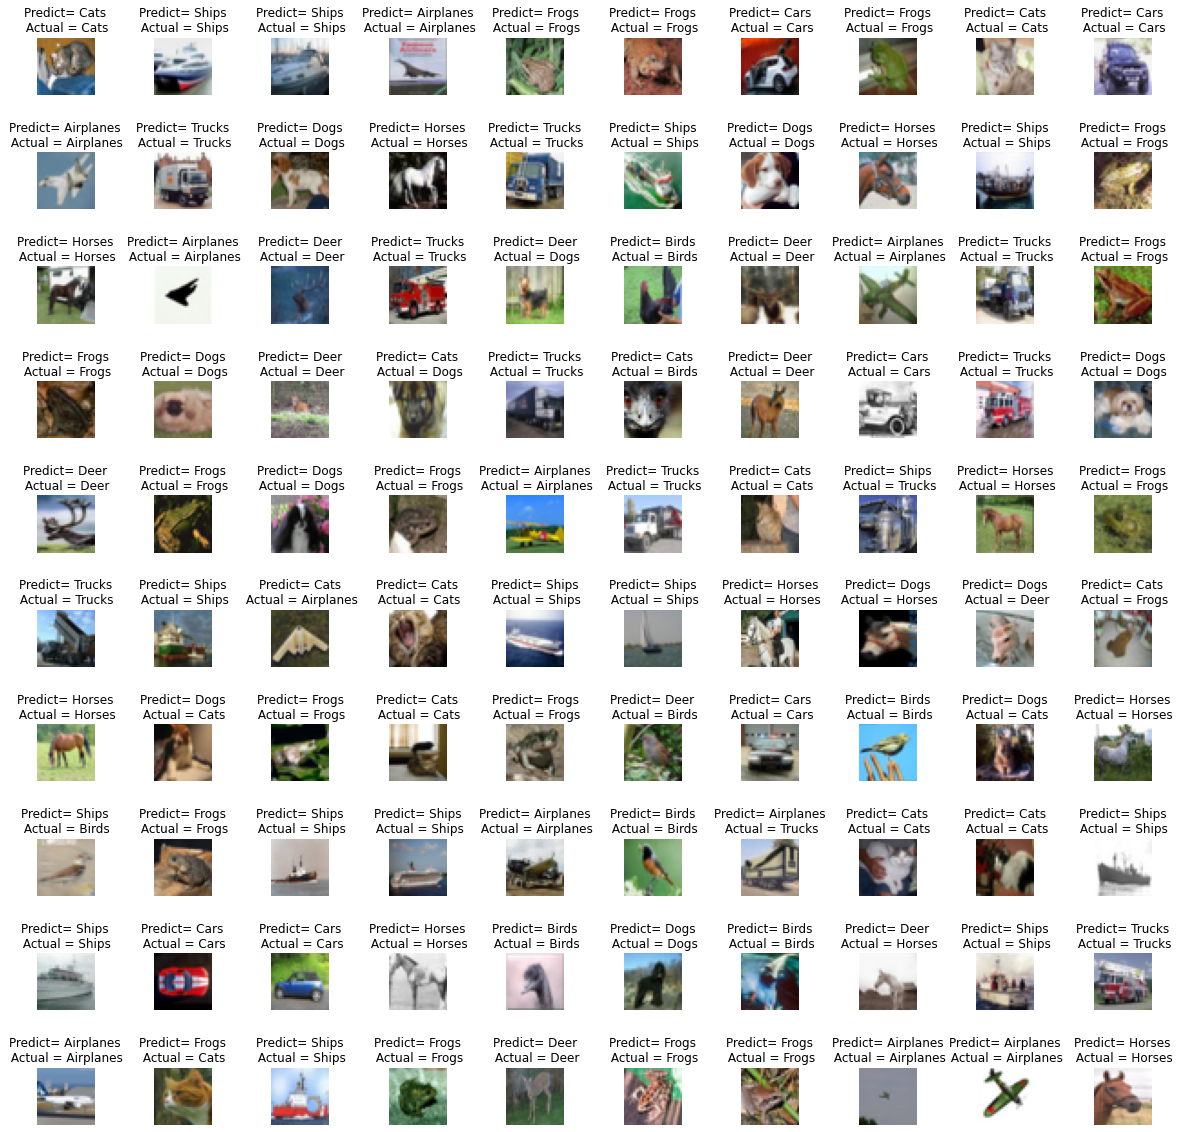

In [67]:
L = 10
W = 10
dict = {'0':'Airplanes','1':'Cars','2':'Birds','3':'Cats','4':'Deer','5':'Dogs','6':'Frogs','7':'Horses','8':'Ships','9':'Trucks'}
fig, axes = plt.subplots(L, W, figsize = (20, 20))
axes = axes.ravel()
plt.rcParams.update({'font.size':10})
for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Predict= {}\n Actual = {}'.format(dict[str(predicted_classes[i])], dict[str(y_test[i])]))
    axes[i].axis('off')
plt.subplots_adjust(wspace = 1,hspace = 1) 